The code below shows us how we can classify tweets to whether they are viral or not.


In [1]:
# begin by loading all our packages for data cleaning and the data

import pandas as pd
import numpy as np

# the data below has been preprocessed and column headers modified 



all_tweets = pd.read_json("random_tweets.json",lines= True)

print(len(all_tweets))
print(all_tweets.columns)


11099
Index(['contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'geo', 'id',
       'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata',
       'place', 'possibly_sensitive', 'quoted_status', 'quoted_status_id',
       'quoted_status_id_str', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'text', 'truncated', 'user',
       'withheld_in_countries'],
      dtype='object')


In [2]:
all_tweets['is_viral']= np.where(all_tweets['retweet_count']> 5,1,0)

med = all_tweets['retweet_count'].median()
print (med)
all_tweets['is_viral_median'] = np.where(all_tweets['retweet_count']>(all_tweets['retweet_count'].median()),1,0)

13.0


In [3]:
#print(all_tweets.columns)

In [4]:
print( all_tweets.is_viral_median.value_counts())

0    5562
1    5537
Name: is_viral_median, dtype: int64


In [5]:
print( all_tweets.is_viral.value_counts())

1    6122
0    4977
Name: is_viral, dtype: int64


In [6]:
# create a new column containing the length of a tweet
# axis=1 creates a new column rather than row

all_tweets['tweet_length']= all_tweets.apply(lambda x: len(x['text']), axis=1 )
all_tweets['followers_count']= all_tweets.apply(lambda y: y['user']['followers_count'], axis=1)
all_tweets['friends_count']= all_tweets.apply(lambda z: z['user']['friends_count'], axis=1)

all_tweets['no_of_hashtags'] = all_tweets.apply(lambda v: v['text'].count('#'), axis=1)
all_tweets['no_of_links'] = all_tweets.apply(lambda w: w['text'].count('http'),axis=1)
all_tweets['nof_tweet_words']=all_tweets.apply(lambda q: len(q['text'].split()),axis=1)



In [7]:
print(all_tweets.tweet_length.head(10))
print(all_tweets.followers_count.head(10))
print(all_tweets.friends_count.head(10))

0    140
1     77
2    140
3    140
4    140
5    139
6    140
7    139
8    140
9    140
Name: tweet_length, dtype: int64
0     215
1     199
2     196
3    3313
4     125
5     128
6     259
7     113
8    1200
9      51
Name: followers_count, dtype: int64
0     335
1     203
2     558
3    2272
4     273
5     496
6     204
7     120
8    2970
9     399
Name: friends_count, dtype: int64


We will use the `tweet_length`,`followers_count` and `friends_count` columns as our feature data.

In [8]:
print(all_tweets.no_of_hashtags.unique())
print(all_tweets.no_of_links.unique())
print(all_tweets.nof_tweet_words.head(10))

[ 0  1  3  2  5  4  6  7  8 10  9]
[0 1 2 4 3]
0    26
1    15
2    22
3    24
4    24
5    24
6    23
7    23
8    23
9    26
Name: nof_tweet_words, dtype: int64


In [9]:
# Normalising data

labels = all_tweets.is_viral_median
data = all_tweets[['tweet_length','followers_count','friends_count']]

In [10]:
from sklearn.preprocessing import scale

# scale function normalises the data so all features will vary in the same range

scaled_data = scale(data,axis=0)

C:\Users\Dominic\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """


In [11]:
print(scaled_data)

[[ 0.6164054  -0.02878298 -0.14483305]
 [-1.64577622 -0.02886246 -0.16209787]
 [ 0.6164054  -0.02887736 -0.11566596]
 ...
 [ 0.6164054  -0.02918038 -0.1768776 ]
 [ 0.6164054  -0.02955792 -0.14679496]
 [-1.71759151 -0.02208668  0.0333085 ]]


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#Creating the Training set and a Test set


train_data, test_data, train_labels, test_labels = train_test_split(data,labels)


In [14]:
# Using a Classifier
from sklearn.neighbors import KNeighborsClassifier

In [15]:
#classifier = KNeighborsClassifier(13)


In [16]:
scores = []

for k in range(1,200):
    classifier = KNeighborsClassifier(n_neighbors =k)
    classifier.fit(train_data,train_labels)
    score = classifier.score(test_data,test_labels)
    scores.append(score)

   


In [17]:
import matplotlib.pyplot as plt


x = range(1,200)
y = scores

plt.plot(x,y)
plt.xlabel('n_neighbors value')
plt.ylabel('Scores')
plt.title('Plot showing the best value to use for classification ')
plt.show()

<Figure size 640x480 with 1 Axes>

In [18]:
#print(all_tweets.head())
#print(all_tweets.info())

In [19]:
from sklearn.preprocessing import scale

data1 = all_tweets[['no_of_hashtags','no_of_links','nof_tweet_words']]
labels1= all_tweets.is_viral_median
#print(data1)
                              
from sklearn.neighbors import KNeighborsClassifier


scaled_data1 = scale(data1, axis = 0)

train_data1, test_data1, train_label1, test_label1 = train_test_split(data1, labels1)

print(data1.shape)
scores1 = []

for m in range(1,200):
    classifier1 = KNeighborsClassifier(n_neighbors = m)
    A=classifier1.fit(train_data1,train_label1)
    score1 = classifier1.score(test_data1,test_label1)
    scores1.append(score1)




C:\Users\Dominic\Miniconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  # Remove the CWD from sys.path while we load stuff.


(11099, 3)


In [20]:



data2= pd.concat([data, data1], axis=1)
scaled_data2 = scale(data2, axis = 0)

train_data2, test_data2, train_label2, test_label2 = train_test_split(data2,labels1)
print(data2.shape)
scores2 = []
for m in range(1,200):
    classifier2 = KNeighborsClassifier(n_neighbors = m)
    A=classifier2.fit(train_data2,train_label2)
    score2 = classifier2.score(test_data2,test_label2)
    scores2.append(score2)


C:\Users\Dominic\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """


(11099, 6)


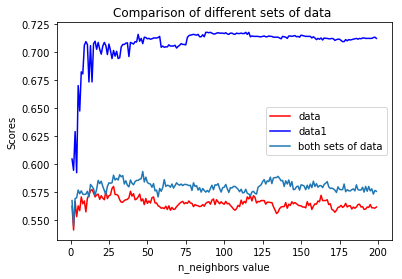

In [23]:





y1= scores1

y2 = scores2 


    
plt.plot(x,y,'r', label="data")
plt.plot(x,y1,'b', label="data1")
plt.plot(x, y2, label='both sets of data')
plt.xlabel('n_neighbors value')
plt.ylabel('Scores')
plt.title('Comparison of different sets of data ')
plt.legend()
plt.show()






# convert the data1 into floats then try again 


From the graph above, we can clearly see that  `data1` feature date gives us higher score than other datasets combined.

This could be explored further to see whether we can optimise the score value by picking different combinations from bothe sets of data. i.e. pick the best 3 features out of the 6 thag will give us the highest score value.

This could be achieved by creating a list with the different combination list and using a loop runs through the column for the list. The results will be saved onto a dataframe with column names such as `comb(1,2,4)` that corresponds to the different columns. from here you can simply return the higest score value for each column.
the columns can then be sorted be highest value on the first row.
Alternatively the columns can be plotted however this will be time consuming.


In [25]:
#data1=data1.reshape(-1,1)

#classifier.predict([88,2000,300])

In [ ]:
print(data1.head())

In [ ]:




# find a way to optimise/overfit the model to find the best 3/6 features that give the highest score(parralel programming)

#### We will now see whether we can improve on this result by using a `DecisionTreeClassifier`


In [ ]:
# begin by importing the classifier
from sklearn.tree import DecisionTreeClassifier
train_data_4, test_data_4, train_labels_4, test_labels_4, =train_test_split(data,labels,random_state =1)

scores_4 = []
for i in range(1,21):
    tree = DecisionTreeClassifier(random_state=1,max_depth=i)
    fitting_test=tree.fit(train_data_4,train_labels_4)
    score_4=tree.score(test_data_4,test_labels_4)
    scores_4.append(score_4)

plt.plot(range(1,21), scores_4)
plt.show()
    




In [ ]:
# we then run a Support vector Classifier 

In [ ]:
from sklearn.svm import SVC

In [ ]:
train_data_5, test_data_5, train_labels_5, test_labels_5 = train_test_split(data,labels, train_size = 0.8, test_size = 0.2, random_state = 100)

SVC_classifier = SVC(kernel = "linear", random_state = 1)
SVC_classifier.fit(train_data_5, train_labels_5)


score_SVC=SVC_classifier.score(test_data_5, test_labels_5)

print(score_SVC)